# 
<h1 style="
    background-color:#2f632a;
    color:#fff;
    padding:20px;
    border-radius:8px;
    text-align:center;
    font-family:Consolas, 'Courier New', monospace;
">
Spotify - Decision Tree
</h1>

<div style="background-color:#f4faf2; font-family:Consolas; padding:10px; border-radius:8px;">

| **Step to be Executed**                                          |
| ---------------------------------------------- | 
| Data Preparation                        | 
| Baseline Decision Tree                            | 
| Handling Data Imbalance                             | 
| Model Tunning                        | 
| Wrap-up Model Evaluation                              |  

 </div>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
1. Data Preparation 
</h2>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:0;
    font-family:Consolas, 'Courier New', monospace;
">1.1 Data Loading 
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">                      
    
The data set spotify_clean_ABT.xlsx that we previously worked on in the  is loaded, the types of the variables as well as basic info is reviewed.
</div>

In [45]:
import pandas as pd

# Read the dataset
df_final_ABT = pd.read_excel("spotify_clean_ABT.xlsx")

# Quick preview
print("File loaded successfully with shape:", df_final_ABT.shape)
df_final_ABT.sample(5)


File loaded successfully with shape: (2085, 23)


artist_popularity  danceability  energy  key  loudness  mode  liveness  \
1182                 72         0.526   0.882    9        60     1    0.1440   
670                  52         0.571   0.953    8        74     1    0.2260   
1878                 89         0.390   0.252    6        98     0    0.0887   
1596                 50         0.644   0.981    7        82     0    0.1100   
1559                 86         0.708   0.598    5        92     1    0.1700   

      valence    tempo  artist_name_encoded  ...  dance_energy_ratio  \
1182    0.424  144.982                  400  ...            0.596371   
670     0.601  137.965                  172  ...            0.599160   
1878    0.181  122.053                  433  ...            1.547613   
1596    0.379  140.012                  435  ...            0.656472   
1559    0.698  112.027                  109  ...            1.183945   

     valence_energy  duration_min  instrumentalness_log  acousticness_log  \
1182       0.373968      3.524883              0.000000          0.001399   
670        0.572753      3.893333              0.000606          0.001099   
1878       0.045612      4.699117              0.000000          0.592221   
1596       0.371799      3.682883              0.000097          0.026739   
1559       0.417404      3.385383              0.000000          0.036332   

      speechiness_log  artist_song_count  artist_avg_popularity  decade  \
1182         0.049647                  9              65.222222    2000   
670          0.053351                  1              67.000000    2000   
1878         0.029365                  7              73.571429    2010   
1596         0.042964                  1              69.000000    2000   
1559         0.028685                 14              71.428571    2020   

      is_modern  
1182          0  
670           0  
1878          0  
1596          0  
1559          1  

[5 rows x 23 columns]

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The dataset is divided into:

・Features (X): all song characteristics

・Target variable (y): the popularity class (e.g., “Low”, “Medium”, “High”, etc.)
</div>

In [46]:
# Define predictors (X) and target (y)
X = df_final_ABT.drop(columns=['popularity_class'])
y = df_final_ABT['popularity_class']

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True) * 100)


Features shape: (2085, 22)
Target distribution:
popularity_class
High      76.115108
Medium    22.206235
Low        1.678657
Name: proportion, dtype: float64


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:0;
    font-family:Consolas, 'Courier New', monospace;
">1.2 Data Split 
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
A stratified train–test split (80/20) is performed to preserve class proportions across splits.
</div>

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {X_train.shape[0]}")
print(f"Testing size: {X_test.shape[0]}")


Training size: 1668
Testing size: 417


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
2. Baseline Decision Tree
</h2>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
2.1 Inicial Decision Tree Model 
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
An initial Decision Tree model is created using:　DecisionTreeClassifier(random_state=42, class_weight='balanced')
The parameter class_weight='balanced' helps the model handle the class imbalance by assigning higher weight to underrepresented classes.
</div>

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Create and train model
dt_model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
# Predictions
y_pred = dt_model.predict(X_test)


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
After training, the model is evaluated using:

・Accuracy and Balanced Accuracy

・Classification Report (Precision, Recall, F1-score)

・Confusion Matrix visualization
</div>

Balanced Accuracy for train data: 1.0
Accuracy for train data: 1.0
Balanced Accuracy for test data: 0.644
Accuracy for test data: 0.827

Classification Report:
               precision    recall  f1-score   support

        High       0.89      0.90      0.89       317
         Low       0.43      0.43      0.43         7
      Medium       0.64      0.60      0.62        93

    accuracy                           0.83       417
   macro avg       0.65      0.64      0.65       417
weighted avg       0.82      0.83      0.83       417



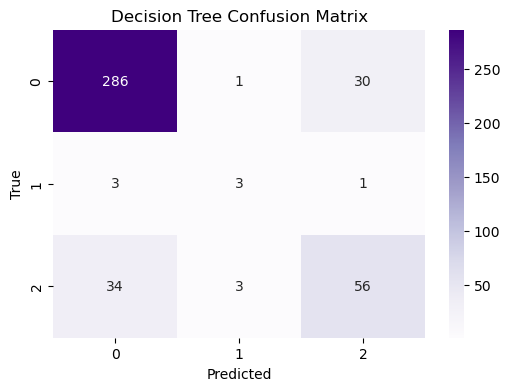

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy for train data:", round(balanced_accuracy_score(y_train, y_pred_train), 3))
print("Accuracy for train data:", round(accuracy_score(y_train, y_pred_train), 3))
print("Balanced Accuracy for test data:", round(balanced_accuracy_score(y_test, y_pred), 3))
print("Accuracy for test data:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
2.2 Feature Importance 
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The initial Feature Importance is plotted to see which variables had the strongest influence on song popularity.
</div>

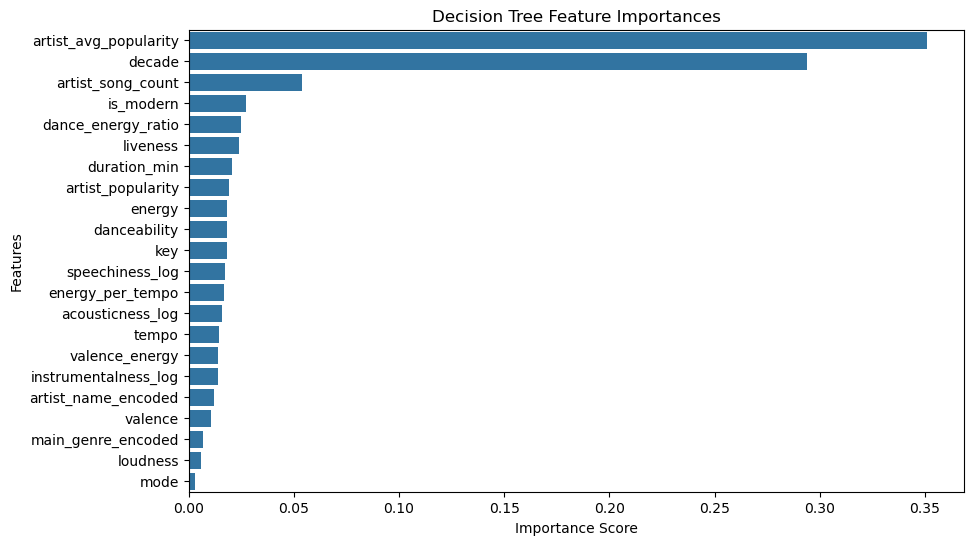

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
2.3 Tree Visualization 
</h2>

In [51]:
#!pip install pydotplus
#!pip install graphviz 
#!pip install io

# you may need to install also this library directly from https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
# and then uncomment following two lines
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz2.38/bin/'

from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def plot_tree(tree, feature_names):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names,
                    filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png("spotify_dt_before.png")
    return Image(graph.create_png())

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\abush\AppData\Local\Temp\ipykernel_8752\1062593518.py:8: SyntaxWarning: invalid escape sequence '\P'
  os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz2.38/bin/'


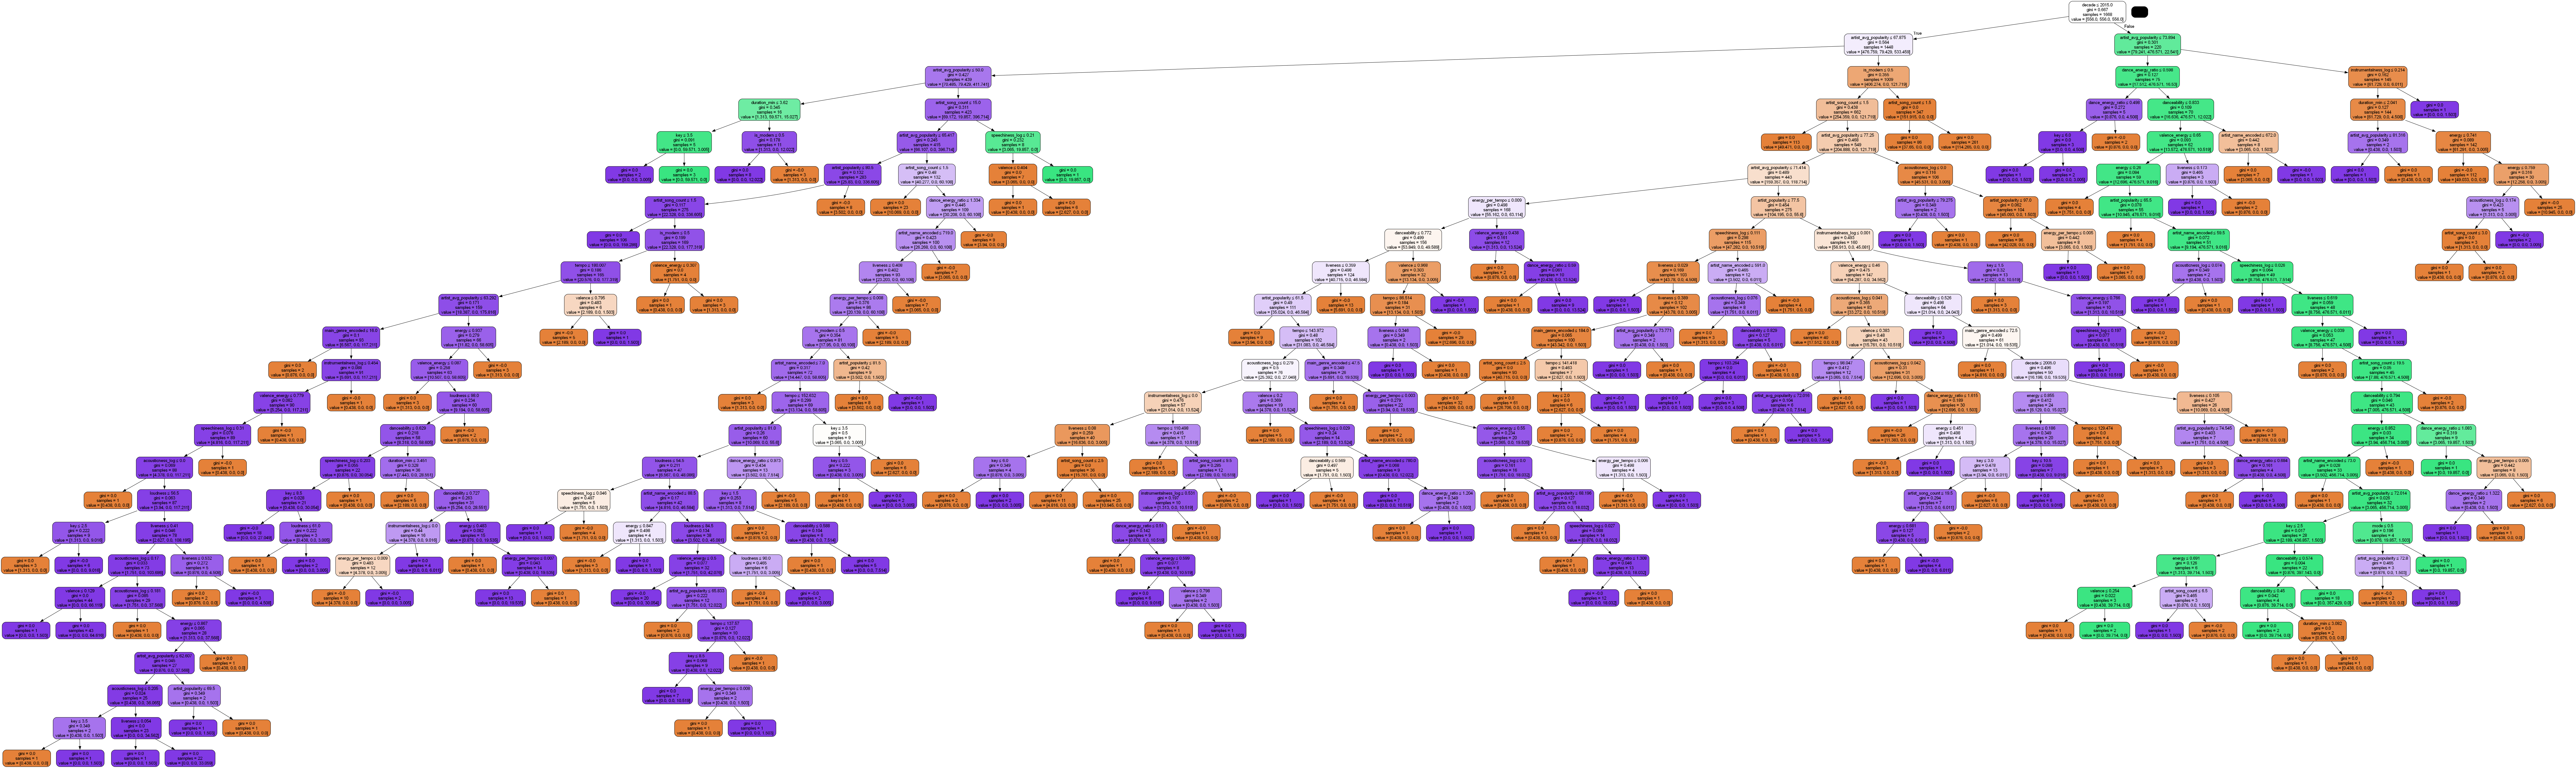

In [52]:
plot_tree(dt_model, X_train.columns)

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
2.4 Tree Details Inspection 
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The root node of the tree is inspected: number of samples, class distribution, and impurity at the root

The overall complexity of the learned tree: total number of nodes and leaves.
</div>

In [53]:
# We can explore each node, for instance this is root node
root_node=dt_model.tree_
node=0
print("Samples: ", root_node.n_node_samples[node])
print("Proportions per class: ",root_node.value[node])
print("Samples per class: ", root_node.value[node]*root_node.n_node_samples[node])
print("Impurity: {0:.2%}".format(root_node.impurity[node]))

Samples:  1668
Proportions per class:  [[0.33333333 0.33333333 0.33333333]]
Samples per class:  [[556. 556. 556.]]
Impurity: 66.67%


In [54]:
# How many nodes and leaves?
print("Number of nodes: ", dt_model.tree_.node_count)
print("Number of leaves: ", dt_model.get_n_leaves())

Number of nodes:  389
Number of leaves:  195


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
3. Handling Imbalance
</h2>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
3.1 SMOTE (Oversampling) Application
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
Because the lower and medium popularity classes had fewer samples, SMOTE (Synthetic Minority Over-sampling Technique) is applied to generate new synthetic samples of the minority classes. This step makes the dataset more balanced and helps the model learn better decision boundaries.
</div>

In [55]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# ========================================
# Apply SMOTE to balance the training set
# ========================================
print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({'High': 1270, 'Medium': 370, 'Low': 28})
After SMOTE: Counter({'Medium': 1270, 'High': 1270, 'Low': 1270})


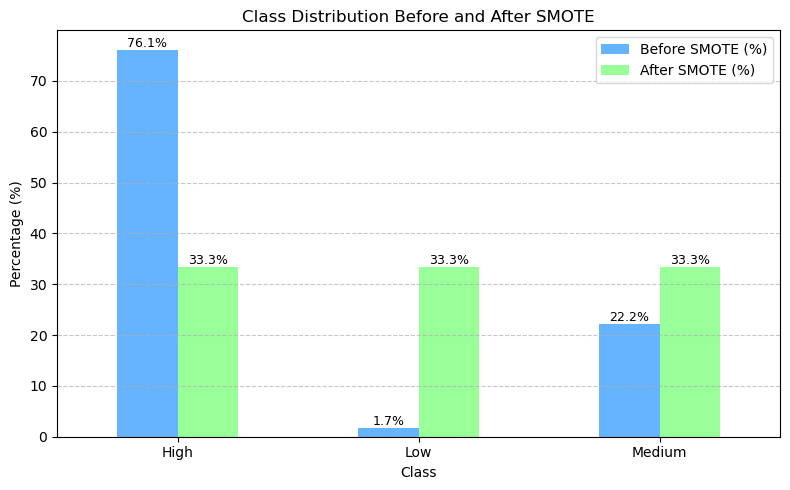

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate counts and percentages
before_counts = pd.Series(y_train).value_counts().sort_index()
after_counts  = pd.Series(y_train_res).value_counts().sort_index()

before_perc = before_counts / before_counts.sum() * 100
after_perc  = after_counts / after_counts.sum() * 100

# Combine for plotting
dist_df = pd.DataFrame({
    'Before SMOTE (%)': before_perc,
    'After SMOTE (%)': after_perc
})

# Plot
ax = dist_df.plot(kind='bar', figsize=(8,5), color=['#66b3ff','#99ff99'])
plt.title("Class Distribution Before and After SMOTE")
plt.ylabel("Percentage (%)")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with both % and counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=9, color='black')
    
plt.legend()
plt.tight_layout()
plt.show()

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
4. Model Tunning
</h2>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
4.1 Hyperparameter Tuning (GridSearchCV)
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The Decision Tree is optimized using GridSearchCV with 5-fold cross-validation. The following values are tested: ・max_depth ・min_samples_split ・min_samples_leaf

This process helps find the combination that gives the best cross-validated accuracy. The tuned model (best_dt) must then be retrained and re-evaluated on the test set.
</div>

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define base model
dt_base = DecisionTreeClassifier(random_state=42,class_weight='balanced')

# Define parameter grid for tuning
param_grid = {
    
    'max_depth': [15,20,25],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10]
   }


In [58]:
import time 
start = time.time()

grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # use all CPU cores
    verbose=1
)

grid_search.fit(X_train_res, y_train_res)

print("Best Parameters Found:")
print(grid_search.best_params_)
print("\nBest Cross-Validation Accuracy:", round(grid_search.best_score_, 4))

end = time.time()
print(f"Training time: {end - start:.2f} seconds")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters Found:
{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}

Best Cross-Validation Accuracy: 0.8913
Training time: 2.42 seconds


In [59]:
best_dt = grid_search.best_estimator_

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
4.2 Tuned Model Evaluation
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
After tuning, the model is again evaluated using:



・Accuracy and Balanced Accuracy 

・Classification Report (Precision, Recall, F1-score) 

・Confusion Matrix visualization 

・Checking for Feature Importance after tuning
</div>

Test Accuracy: 0.815

Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.88      0.89       317
         Low       0.21      0.43      0.29         7
      Medium       0.63      0.62      0.63        93

    accuracy                           0.82       417
   macro avg       0.58      0.64      0.60       417
weighted avg       0.83      0.82      0.82       417

Balanced Accuracy for train data: 0.955
Accuracy for train data: 0.955
Balanced Accuracy for test data: 0.644
Accuracy for test data: 0.815


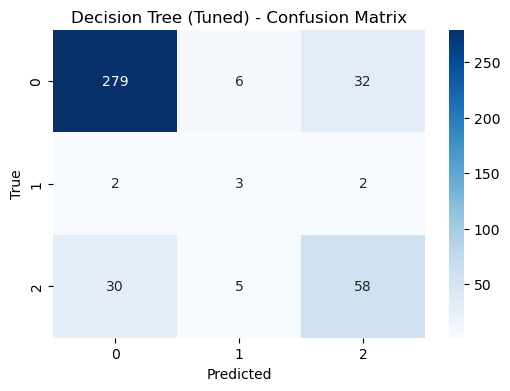

In [60]:
# 1️Make predictions with your tuned Decision Tree model
y_pred_best = best_dt.predict(X_test)
y_train_best = best_dt.predict(X_train_res)
# 2️Evaluate tuned Decision Tree model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Test Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

print("Balanced Accuracy for train data:", round(balanced_accuracy_score(y_train_res, y_train_best), 3))
print("Accuracy for train data:", round(accuracy_score(y_train_res, y_train_best), 3))

print("Balanced Accuracy for test data:", round(balanced_accuracy_score(y_test, y_pred_best), 3))
print("Accuracy for test data:", round(accuracy_score(y_test, y_pred_best), 3))


# 3️Confusion Matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree (Tuned) - Confusion Matrix')
plt.show()



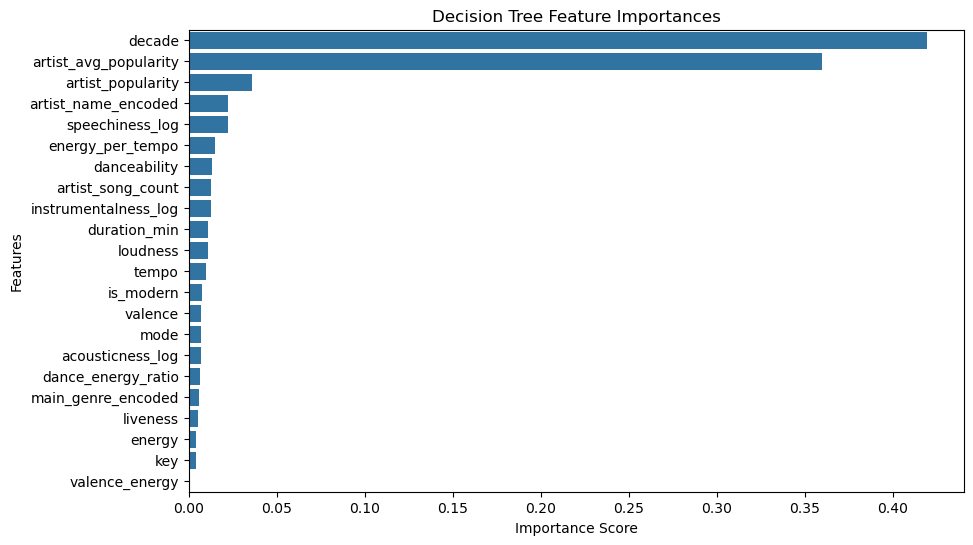

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The tuned tree is exported as a plain‑text set of rules and saved to tree_pruned.log.
</div>

In [62]:
from sklearn import tree

text_representation = tree.export_text(best_dt, feature_names=list(X_test.columns))
print(text_representation)

# optionally, we can export them to a text file
with open("tree_pruned.log", "w") as fout:
    fout.write(text_representation)

|--- decade <= 2010.50
|   |--- artist_avg_popularity <= 68.00
|   |   |--- artist_popularity <= 77.50
|   |   |   |--- artist_avg_popularity <= 42.10
|   |   |   |   |--- class: Low
|   |   |   |--- artist_avg_popularity >  42.10
|   |   |   |   |--- artist_avg_popularity <= 65.49
|   |   |   |   |   |--- is_modern <= 0.50
|   |   |   |   |   |   |--- loudness <= 27.00
|   |   |   |   |   |   |   |--- class: Low
|   |   |   |   |   |   |--- loudness >  27.00
|   |   |   |   |   |   |   |--- artist_popularity <= 67.50
|   |   |   |   |   |   |   |   |--- tempo <= 181.86
|   |   |   |   |   |   |   |   |   |--- artist_avg_popularity <= 63.66
|   |   |   |   |   |   |   |   |   |   |--- liveness <= 0.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- liveness >  0.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- artist_avg_popularity >  63.66
|

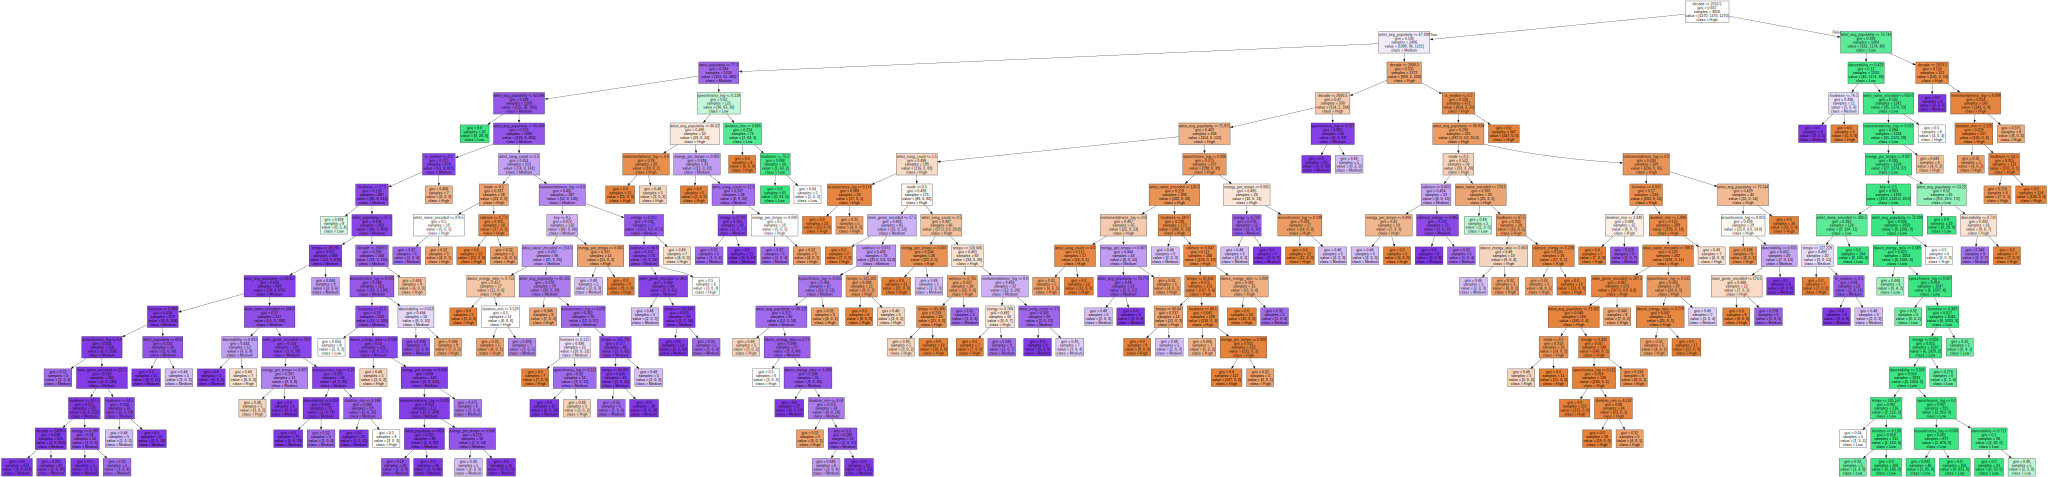

In [63]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(best_dt, out_file=None, 
                               class_names = ["High", "Low", "Medium","Very High"],
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
4.3 ROC Curves and AUC
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
ROC curves are plotted for each class (one-vs-rest) with AUC values and optimal threshold points marked.
</div>

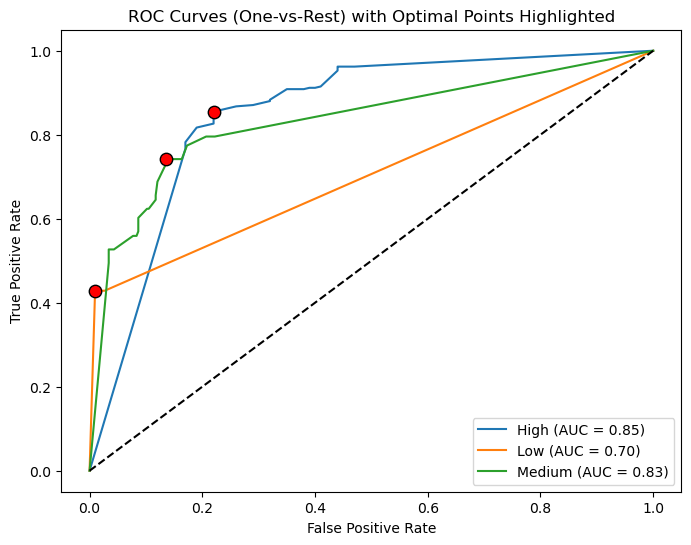

Class order used: ['High' 'Low' 'Medium']
Optimal thresholds: {'High': 0.6666666666666666, 'Low': 1.0, 'Medium': 0.375}


In [64]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


model_classes = best_dt.classes_ 
y_pred_proba = best_dt.predict_proba(X_test)


y_test_bin = label_binarize(y_test, classes=model_classes)


fpr, tpr, thresholds_dict, roc_auc, optimal_thresholds = {}, {}, {}, {}, {}

for i, cls in enumerate(model_classes):
    fpr[cls], tpr[cls], thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    thresholds_dict[cls] = thresholds
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

    j_scores = tpr[cls] - fpr[cls]
    best_idx = np.argmax(j_scores)
    optimal_thresholds[cls] = thresholds[best_idx]

# ROC Curves
plt.figure(figsize=(8, 6))
for cls in model_classes:
    plt.plot(fpr[cls], tpr[cls], label=f"{cls} (AUC = {roc_auc[cls]:.2f})")
    best_idx = np.argmax(tpr[cls] - fpr[cls])
    plt.scatter(
        fpr[cls][best_idx],
        tpr[cls][best_idx],
        color="red",
        s=80,
        edgecolor="black",
        zorder=5,
    )

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves (One-vs-Rest) with Optimal Points Highlighted")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("Class order used:", model_classes)
print("Optimal thresholds:", optimal_thresholds)

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
5. Wrap-up Model Evaluation
</h2>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    font-family:Consolas, 'Courier New', monospace;
">
5.1 Final Metrics Summary
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The tuned model’s accuracy is compared against the baseline.
</div>

In [65]:
print("Base Model Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Tuned Model Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))

Base Model Accuracy: 0.827
Tuned Model Accuracy: 0.815


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
Finally, the key performance metrics are calculated:

・Accuracy

・Balanced Accuracy

・Macro and Weighted F1-scores
</div>

In [66]:
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, balanced_accuracy_score, classification_report
)

# Compute all key metrics
acc = accuracy_score(y_test, y_pred_best)
bal_acc = balanced_accuracy_score(y_test, y_pred_best)
macro_f1 = f1_score(y_test, y_pred_best, average='macro')
weighted_f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy for tuned model: {acc:.3f}")
print(f"Balanced Accuracy tuned model: {bal_acc:.3f}")
print(f"Macro F1-score tuned model: {macro_f1:.3f}")
print(f"Weighted F1-score tuned model: {weighted_f1:.3f}")

# Detailed report per class
print("\nClassification Report for tuned model:")
print(classification_report(y_test, y_pred_best))


Accuracy for tuned model: 0.815
Balanced Accuracy tuned model: 0.644
Macro F1-score tuned model: 0.600
Weighted F1-score tuned model: 0.820

Classification Report for tuned model:
              precision    recall  f1-score   support

        High       0.90      0.88      0.89       317
         Low       0.21      0.43      0.29         7
      Medium       0.63      0.62      0.63        93

    accuracy                           0.82       417
   macro avg       0.58      0.64      0.60       417
weighted avg       0.83      0.82      0.82       417

